In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [82]:
product_sales_raw = pd.read_csv('product_sales_old.csv')
product_sales = pd.read_csv('product_sales.csv')
print(product_sales.head())
print("Shape: ", product_sales.shape)
print(product_sales.info())
print(product_sales.describe())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  18919515-a618-430c-9a05-2c7d8fea96af       10    97.22   
1     4          Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10    50.47   
2     5  Email + Call  ace324ea-fb31-4644-8ad6-12e41e76b1a8       12    93.93   
3     2         Email  38a2040b-ab8d-4522-a453-07b3d1ff47af       10   101.41   
4     1         Email  ae6df2ea-c55a-4251-803f-3daaf49d3f94        9    85.49   

   years_as_customer  nb_site_visits       state  
0                 38              24  California  
1                 38              27  California  
2                 38              29    New York  
3                 38              25   Tennessee  
4                 38              22       Texas  
Shape:  (15000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------

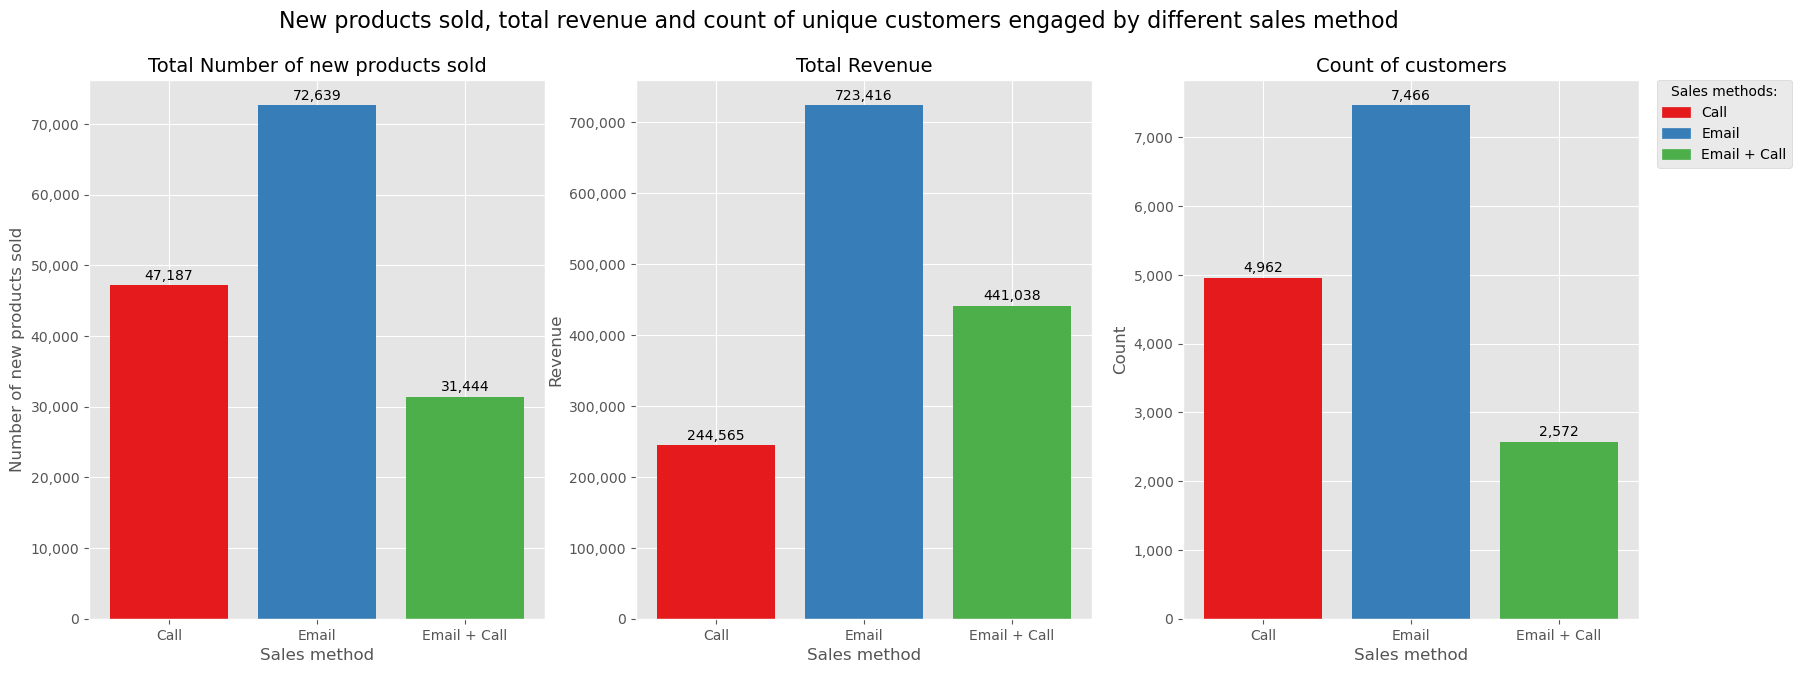

In [20]:
fig, ax = plt.subplots(1,3,sharex=True,figsize=(20,7))

formatter = plt.FuncFormatter(lambda x, p: format(int(x), ','))
for nn, x in enumerate(ax):
    ax[nn].yaxis.set_major_formatter(formatter)
    
b_colors = {'Call':'#e41a1c', 'Email':'#377eb8', 'Email + Call':'#4daf4a'}
labels = list(b_colors.keys())
colors = list(b_colors.values())
handles = [plt.Rectangle((0,0),1,1, color=b_colors[x]) for x in labels]

nb_sold_sum = product_sales.groupby("sales_method").nb_sold.sum().reset_index()
revenue_sum = product_sales.groupby("sales_method").revenue.sum().reset_index()
customers_count = product_sales.groupby("sales_method").customer_id.count().reset_index()
nb_sold_sum_bar = ax[0].bar(nb_sold_sum.sales_method, nb_sold_sum.nb_sold, label=labels, color=colors)
revenue_sum_bar = ax[1].bar(revenue_sum.sales_method, revenue_sum.revenue, label=labels, color=colors)
customers_count_bar = ax[2].bar(customers_count.sales_method, customers_count.customer_id, label=labels, color=colors)

ax[0].set_title("Total Number of new products sold", fontsize=14)
ax[0].set_ylabel('Number of new products sold')
ax[0].set_xlabel('Sales method')
ax[0].bar_label(nb_sold_sum_bar, padding = 2, labels=[f'{x:,.0f}' for x in nb_sold_sum_bar.datavalues])
ax[1].set_title("Total Revenue", fontsize=14)
ax[1].set_ylabel('Revenue')
ax[1].set_xlabel('Sales method')
ax[1].bar_label(revenue_sum_bar, padding = 2, labels=[f'{x:,.0f}' for x in revenue_sum_bar.datavalues])
ax[2].set_title("Count of customers", fontsize=14)
ax[2].set_ylabel('Count',fontsize=12)
ax[2].set_xlabel('Sales method')
ax[2].bar_label(customers_count_bar, padding = 2, labels=[f'{x:,.0f}' for x in customers_count_bar.datavalues])
fig.suptitle('New products sold, total revenue and count of unique customers engaged by different sales method', fontsize=16)
fig.legend(handles, labels, title='Sales methods:', loc='upper right', bbox_to_anchor=(.98, .89))

#plt.savefig('slide1.png', bbox_inches='tight', transparent=True)
plt.show()

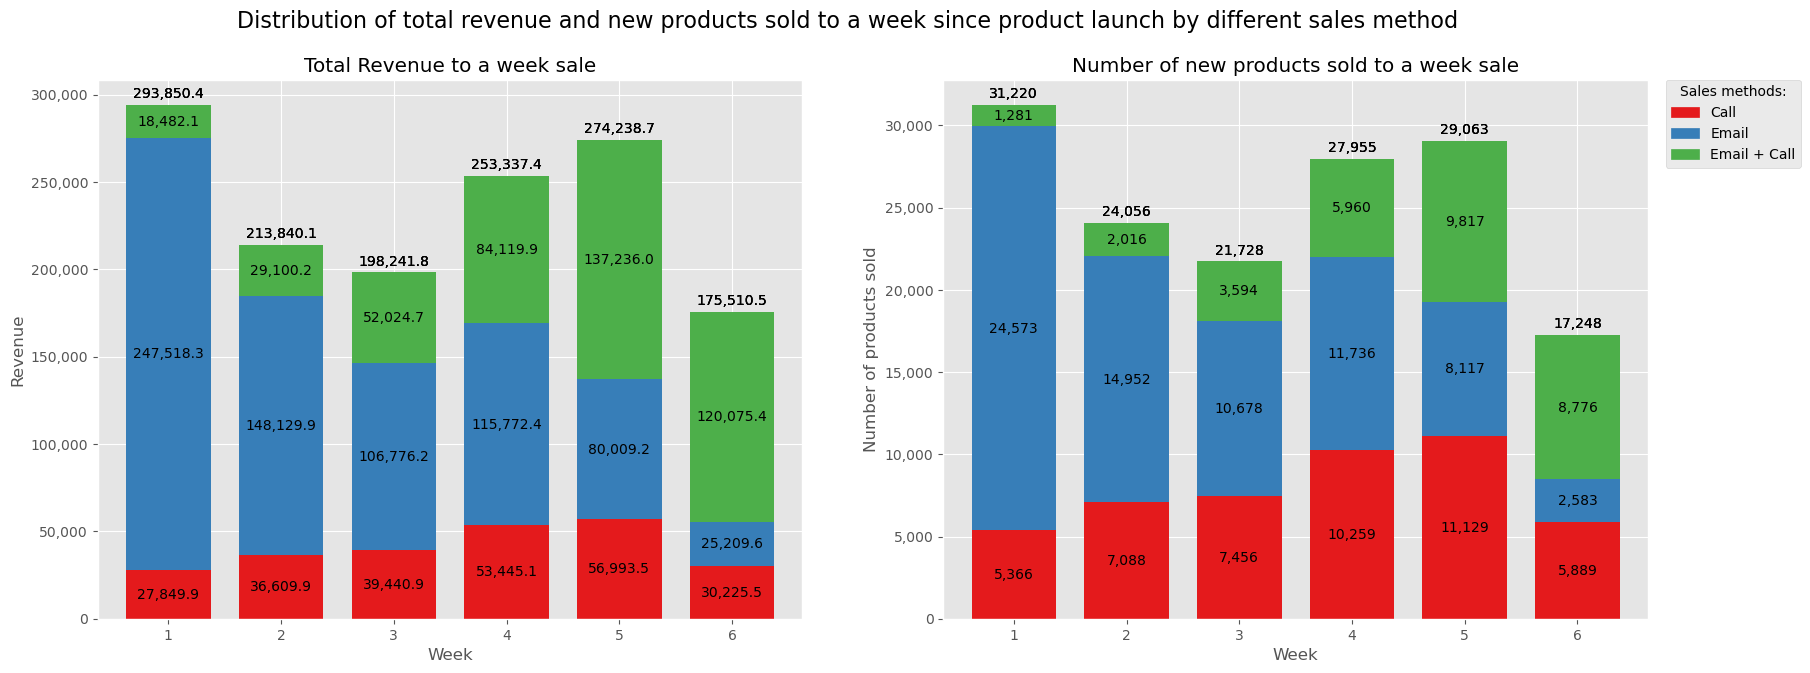

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
for nn, x in enumerate(ax):
    ax[nn].yaxis.set_major_formatter(formatter)

w_sales_method_revenue_sum = product_sales.pivot_table(index="week", columns="sales_method",values="revenue",aggfunc='sum')
w_sales_method_nb_sold_sum = product_sales.pivot_table(index="week", columns="sales_method",values="nb_sold",aggfunc='sum')
total_revenue_byweek = product_sales.groupby("week").revenue.sum()
total_nb_sold_byweek = product_sales.groupby("week").nb_sold.sum()

ax1 = w_sales_method_revenue_sum.plot(ax=ax[0], kind='bar', stacked=True, color=colors, width=.75, rot = 0, legend=None,
                        title="Total Revenue to a week sale",
                        ylabel='Revenue',
                        xlabel='Week')
for d in ax[0].containers:
    ax[0].bar_label(d, label_type='center', labels=[f'{x:,.1f}' for x in d.datavalues])
    ax[0].bar_label(ax[0].containers[-1], labels=[f'{y:,.1f}' for y in total_revenue_byweek], padding = 3, label_type='edge')

ax2 = w_sales_method_nb_sold_sum.plot(ax=ax[1], kind='bar', stacked=True, color=colors, width=.75, rot = 0, legend=None,
                    title='Number of new products sold to a week sale',
                    ylabel='Number of products sold',
                    xlabel='Week')
for d in ax[1].containers:
    ax[1].bar_label(d, label_type='center', labels=[f'{x:,.0f}' for x in d.datavalues])
    ax[1].bar_label(ax[1].containers[-1], labels=[f'{y:,.0f}' for y in total_nb_sold_byweek], padding = 3, label_type='edge')

fig.suptitle('Distribution of total revenue and new products sold to a week since product launch by different sales method', fontsize=16)
fig.legend(handles, labels, title='Sales methods:', loc='upper right', bbox_to_anchor=(.98, .89))

plt.show()

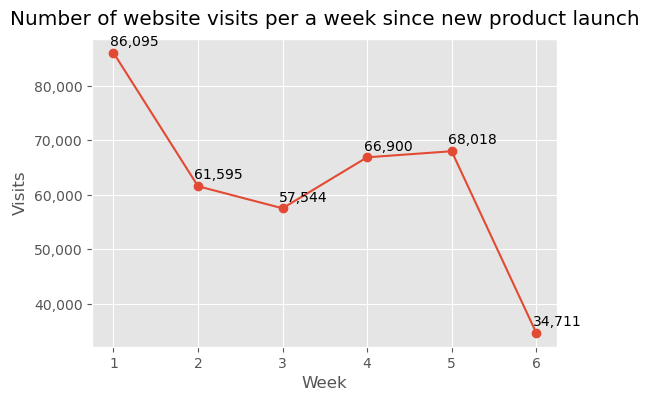

In [71]:
fig, ax = plt.subplots(figsize=(6,4))
ax.get_yaxis().set_major_formatter(formatter)

weeks_visits = product_sales.groupby("week").nb_site_visits.sum().reset_index()

plot = ax.plot(weeks_visits.week, weeks_visits.nb_site_visits, marker='o')
ax.set_title("Number of website visits per a week since new product launch", pad=10)
ax.set_ylabel('Visits')
ax.set_xlabel('Week')
for x,y in zip(weeks_visits.week, weeks_visits.nb_site_visits):
    label = "{:,.0f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(15,5), ha='center')
    
plt.show()

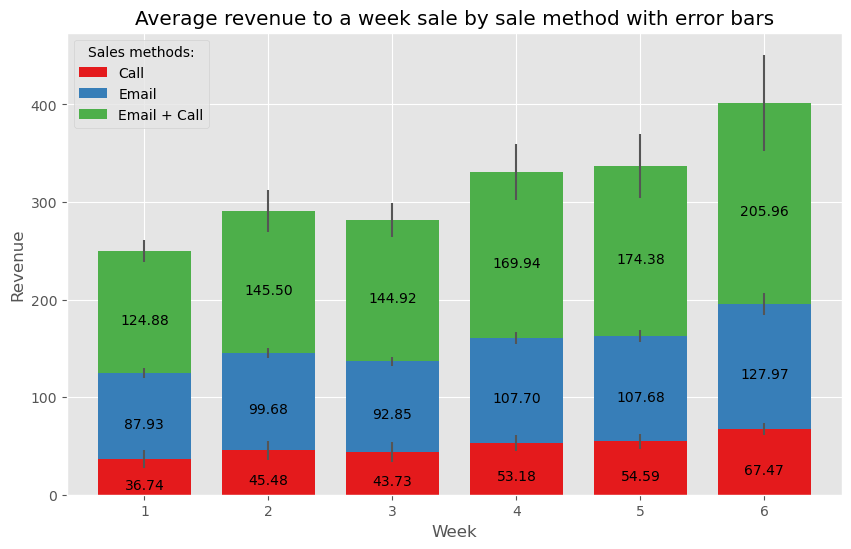

In [303]:
revenue_mean = product_sales.pivot_table(index="week", columns="sales_method",values="revenue",aggfunc='mean')
revenue_std = product_sales.pivot_table(index="week", columns="sales_method",values="revenue",aggfunc='std')
bar = revenue_mean.plot(kind='bar', stacked=True, figsize=(10,6), yerr=revenue_std, color=colors, width=.75,
                       title='Average revenue to a week sale by sale method with error bars',
                       ylabel='Revenue',
                       xlabel='Week')
plt.xticks(rotation='horizontal')
for c in bar.containers[1::2]:
    bar.bar_label(c, label_type='center',  fmt='\n%.2f')
plt.legend(title='Sales methods:')

plt.show()

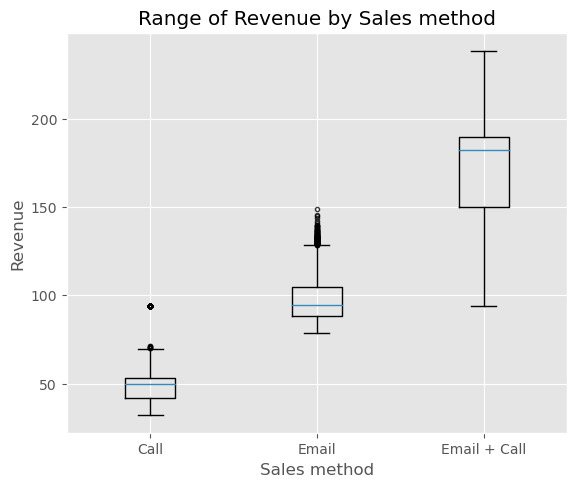

In [38]:
fig = plt.figure(figsize = [5, 4])

revenue_data_bymethods = []
for i in labels:
    a = product_sales['sales_method'] == i
    row = product_sales[a]
    revenue_data_bymethods.append(row['revenue'])

ax = fig.add_axes([1, 1, 1, 1], title='Range of Revenue by Sales method', xlabel = 'Sales method', ylabel='Revenue')
flierprops = dict(marker ='o', color ='#e7298a', alpha = .75,  markersize = 3)
ax.boxplot(revenue_data_bymethods, flierprops=flierprops)
ax.set_xticklabels(labels)

plt.show()

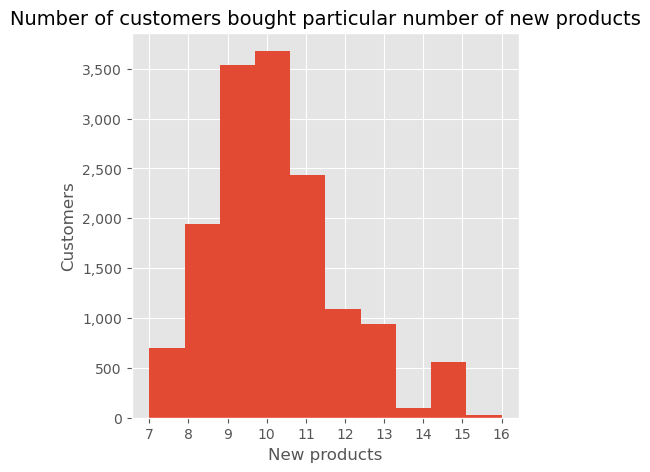

In [81]:
fig, ax = plt.subplots(figsize=(5,5))
ax.get_yaxis().set_major_formatter(formatter)

bin = max(product_sales.nb_sold) - min(product_sales.nb_sold) + 1
bins = ax.hist(product_sales.nb_sold, bins = bin)

ax.set_xticks(product_sales.nb_sold.unique())
ax.set_title("Number of customers bought particular number of new products", fontsize=14)
ax.set_ylabel('Customers')
ax.set_xlabel('New products')

plt.show()

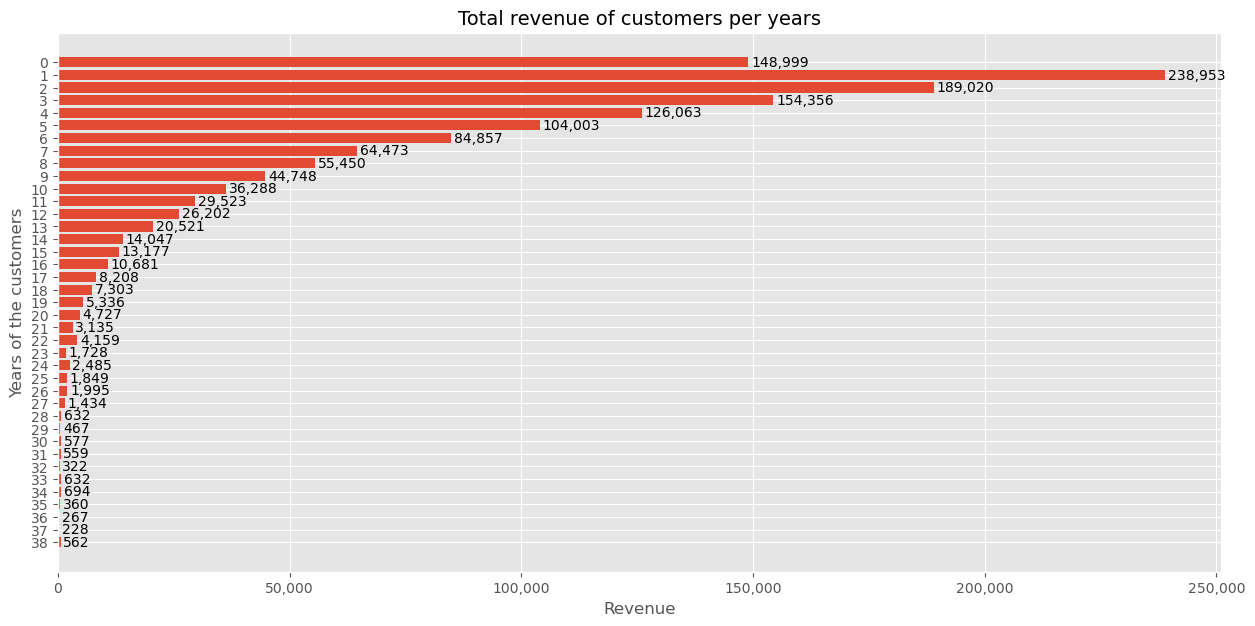

In [68]:
fig, ax = plt.subplots(figsize=(15,7))

ax.get_xaxis().set_major_formatter(formatter)

years_as_customer_revenue = product_sales.groupby("years_as_customer").revenue.sum().reset_index().sort_values(by='years_as_customer', ascending=False)
years_as_customer_nb_site_visits = product_sales.groupby("years_as_customer").nb_site_visits.sum().reset_index().sort_values(by='years_as_customer', ascending=False)

ax1 = ax.barh(years_as_customer_revenue.years_as_customer.sort_values(ascending=True), years_as_customer_revenue.revenue)
ax.bar_label(ax.containers[-1], padding = 2, labels=[f'{x:,.0f}' for x in ax1.datavalues])
ax.set_yticks([i for i in range(len(years_as_customer_revenue.years_as_customer))[::1]], years_as_customer_revenue.years_as_customer)
ax.set_title("Total revenue of customers per years", fontsize=14)
ax.set_ylabel('Years of the customers')
ax.set_xlabel('Revenue')

plt.savefig('slide6.png', bbox_inches='tight', transparent=True)
plt.show()

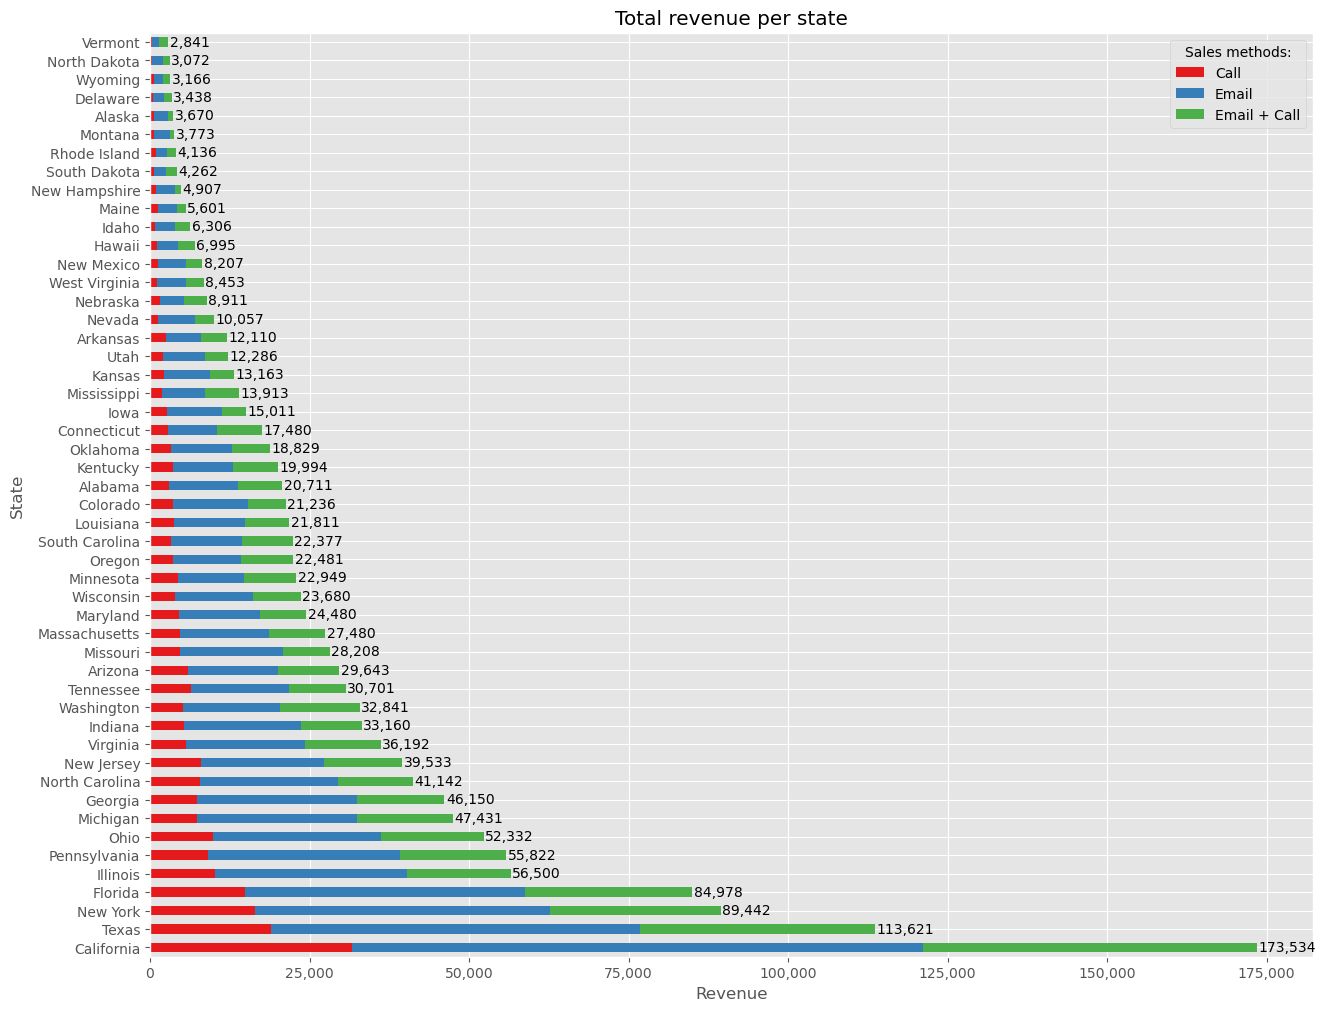

In [65]:
state_revenue_sum_total = product_sales.pivot_table(index=["state"], columns=["sales_method"],values="revenue",aggfunc='sum')
state_revenue_sum_total['Total'] = state_revenue_sum_total.sum(axis=1)
state_revenue_sum_total.sort_values('Total', ascending=False, inplace=True)
state_revenue_sum = state_revenue_sum_total.drop('Total', axis=1)
state_revenue_sum_barh = state_revenue_sum.plot(kind='barh', stacked=True, figsize=(15,12), color=colors,
                                                                                   title='Total revenue per state')
state_revenue_sum_barh.bar_label(state_revenue_sum_barh.containers[-1], padding=1, labels=[f'{y:,.0f}' for y in state_revenue_sum_total.Total])
state_revenue_sum_barh.set_xlabel('Revenue')
state_revenue_sum_barh.set_ylabel('State')
state_revenue_sum_barh.get_xaxis().set_major_formatter(formatter)
plt.legend(title='Sales methods:')

plt.show()

In [308]:
"""nb_sold_by_method = product_sales.groupby("sales_method").nb_sold.sum()
nb_sold_by_method["perc"] = nb_sold_by_method/nb_sold_by_method.sum()*100
print(nb_sold_by_method["perc"])

revenue_sum_by_method = product_sales.groupby("sales_method").revenue.sum()
revenue_sum_by_method["perc"] = revenue_sum_by_method/revenue_sum_by_method.sum()*100
print("revenue:", revenue_sum_by_method["perc"])
revenue_count_by_method = product_sales.groupby("sales_method").revenue.count()
revenue_count_by_method["perc"] = revenue_count_by_method/revenue_count_by_method.sum()*100
print("revenue:", revenue_sum_by_method["perc"])

#users_by_method = product_sales.groupby("sales_method")["customer_id"].count()
#print(users_by_method)"""

'nb_sold_by_method = product_sales.groupby("sales_method").nb_sold.sum()\nnb_sold_by_method["perc"] = nb_sold_by_method/nb_sold_by_method.sum()*100\nprint(nb_sold_by_method["perc"])\n\nrevenue_sum_by_method = product_sales.groupby("sales_method").revenue.sum()\nrevenue_sum_by_method["perc"] = revenue_sum_by_method/revenue_sum_by_method.sum()*100\nprint("revenue:", revenue_sum_by_method["perc"])\nrevenue_count_by_method = product_sales.groupby("sales_method").revenue.count()\nrevenue_count_by_method["perc"] = revenue_count_by_method/revenue_count_by_method.sum()*100\nprint("revenue:", revenue_sum_by_method["perc"])\n\n#users_by_method = product_sales.groupby("sales_method")["customer_id"].count()\n#print(users_by_method)'

In [309]:
"""fig, ax = plt.subplots(1,1)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

years_as_customer_revenue = product_sales.groupby("years_as_customer").revenue.sum().reset_index().sort_values(by='years_as_customer', ascending=False)

ax.barh(years_as_customer_revenue["years_as_customer"].sort_values(ascending=True), years_as_customer_revenue["revenue"])
ax.bar_label(ax.containers[-1], fontsize=7.5)
ax.set_yticks([i for i in range(len(years_as_customer_revenue["years_as_customer"]))[::1]],years_as_customer_revenue["years_as_customer"])
plt.show()"""

'fig, ax = plt.subplots(1,1)\nax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), \',\')))\n\nyears_as_customer_revenue = product_sales.groupby("years_as_customer").revenue.sum().reset_index().sort_values(by=\'years_as_customer\', ascending=False)\n\nax.barh(years_as_customer_revenue["years_as_customer"].sort_values(ascending=True), years_as_customer_revenue["revenue"])\nax.bar_label(ax.containers[-1], fontsize=7.5)\nax.set_yticks([i for i in range(len(years_as_customer_revenue["years_as_customer"]))[::1]],years_as_customer_revenue["years_as_customer"])\nplt.show()'

In [310]:
"""fig, ax = plt.subplots(1,1)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

years_as_customer_nb_site_visits = product_sales.groupby("years_as_customer").nb_site_visits.sum().reset_index().sort_values(by='years_as_customer', ascending=False)
ax.barh(years_as_customer_nb_site_visits["years_as_customer"].sort_values(ascending=True), years_as_customer_nb_site_visits["nb_site_visits"])

ax.bar_label(ax.containers[-1], fontsize=7.5)
ax.set_yticks([i for i in range(len(years_as_customer_nb_site_visits["years_as_customer"]))[::1]],years_as_customer_nb_site_visits["years_as_customer"])
plt.show()"""

'fig, ax = plt.subplots(1,1)\nax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), \',\')))\n\nyears_as_customer_nb_site_visits = product_sales.groupby("years_as_customer").nb_site_visits.sum().reset_index().sort_values(by=\'years_as_customer\', ascending=False)\nax.barh(years_as_customer_nb_site_visits["years_as_customer"].sort_values(ascending=True), years_as_customer_nb_site_visits["nb_site_visits"])\n\nax.bar_label(ax.containers[-1], fontsize=7.5)\nax.set_yticks([i for i in range(len(years_as_customer_nb_site_visits["years_as_customer"]))[::1]],years_as_customer_nb_site_visits["years_as_customer"])\nplt.show()'

In [311]:
"""fig, ax = plt.subplots(figsize=(11,9))

state_visits = product_sales.groupby("state").revenue.sum().reset_index().sort_values(by='revenue', ascending=False)

ax.barh(range(len(state_visits["state"])), state_visits["revenue"])

ax.bar_label(ax.containers[-1], fontsize=7.5)
ax.set_yticks(range(len(state_visits["state"])),state_visits["state"])
#print(state_visits.head())
plt.show()"""

'fig, ax = plt.subplots(figsize=(11,9))\n\nstate_visits = product_sales.groupby("state").revenue.sum().reset_index().sort_values(by=\'revenue\', ascending=False)\n\nax.barh(range(len(state_visits["state"])), state_visits["revenue"])\n\nax.bar_label(ax.containers[-1], fontsize=7.5)\nax.set_yticks(range(len(state_visits["state"])),state_visits["state"])\n#print(state_visits.head())\nplt.show()'

In [312]:
"""ps_state_rev_avg = product_sales.pivot_table(index=["state"], columns=["sales_method"],values="revenue",aggfunc='sum')
ax_ps_state_rev_s = ps_state_rev_avg.plot(kind='barh', stacked=True, title='Title', figsize=(11,9), color=colors)
plt.show()"""

'ps_state_rev_avg = product_sales.pivot_table(index=["state"], columns=["sales_method"],values="revenue",aggfunc=\'sum\')\nax_ps_state_rev_s = ps_state_rev_avg.plot(kind=\'barh\', stacked=True, title=\'Title\', figsize=(11,9), color=colors)\nplt.show()'

In [313]:
"""ps_w_s = product_sales.pivot_table(index=["week"], columns=["sales_method"],values="revenue",aggfunc='sum')
ax_ps_w_s = ps_w_s.plot(kind='bar', stacked=True, 
                        color=colors, width=0.75,
                        figsize=(10,6),
                        title="Differentiation of Total Revenue to week sale by sale method",
                        ylabel='Revenue',
                        xlabel='Week')
plt.xticks(rotation='horizontal')
plt.legend(title='Sales methods:')
ax_ps_w_s.get_yaxis().set_major_formatter(formatter)
for d in ax_ps_w_s.containers:
    ax_ps_w_s.bar_label(d, label_type='center', labels=[f'{x:,.1f}' for x in d.datavalues], fontsize=9)
    ax_ps_w_s.bar_label(ax_ps_w_s.containers[-1], labels=[f'{y:,.1f}' for y in product_sales.groupby("week").revenue.sum().reset_index()["revenue"]], padding = 3, label_type='edge', fontsize=9)
plt.show()"""

'ps_w_s = product_sales.pivot_table(index=["week"], columns=["sales_method"],values="revenue",aggfunc=\'sum\')\nax_ps_w_s = ps_w_s.plot(kind=\'bar\', stacked=True, \n                        color=colors, width=0.75,\n                        figsize=(10,6),\n                        title="Differentiation of Total Revenue to week sale by sale method",\n                        ylabel=\'Revenue\',\n                        xlabel=\'Week\')\nplt.xticks(rotation=\'horizontal\')\nplt.legend(title=\'Sales methods:\')\nax_ps_w_s.get_yaxis().set_major_formatter(formatter)\nfor d in ax_ps_w_s.containers:\n    ax_ps_w_s.bar_label(d, label_type=\'center\', labels=[f\'{x:,.1f}\' for x in d.datavalues], fontsize=9)\n    ax_ps_w_s.bar_label(ax_ps_w_s.containers[-1], labels=[f\'{y:,.1f}\' for y in product_sales.groupby("week").revenue.sum().reset_index()["revenue"]], padding = 3, label_type=\'edge\', fontsize=9)\nplt.show()'

In [314]:
"""ps_w_nb_s = product_sales.pivot_table(index=["week"], columns=["sales_method"],values="nb_sold",aggfunc='sum')
ax_ps_w_nb_s = ps_w_nb_s.plot(kind='bar', stacked=True, title='Title', figsize=(10,6), color=colors, width=0.75)
plt.xticks(rotation='horizontal')
for d in ax_ps_w_nb_s.containers:
    ax_ps_w_nb_s.bar_label(d, label_type='center', labels=[f'{x:,.0f}' for x in d.datavalues], fontsize=9)

plt.show()"""

'ps_w_nb_s = product_sales.pivot_table(index=["week"], columns=["sales_method"],values="nb_sold",aggfunc=\'sum\')\nax_ps_w_nb_s = ps_w_nb_s.plot(kind=\'bar\', stacked=True, title=\'Title\', figsize=(10,6), color=colors, width=0.75)\nplt.xticks(rotation=\'horizontal\')\nfor d in ax_ps_w_nb_s.containers:\n    ax_ps_w_nb_s.bar_label(d, label_type=\'center\', labels=[f\'{x:,.0f}\' for x in d.datavalues], fontsize=9)\n\nplt.show()'

In [315]:
'''fig, ax = plt.subplots(1,1)
weeks_revenue = product_sales.groupby("week").revenue.sum().reset_index()
ax.bar(weeks_revenue["week"], weeks_revenue["revenue"])
ax.bar_label(ax.bar(weeks_revenue["week"], weeks_revenue["revenue"]))
plt.show()'''

'''tt1 = product_sales.groupby(['week', 'sales_method']).revenue.sum().reset_index()
tt2 = tt1.pivot(index='week', columns='sales_method', values='revenue')
tt2.plot(ax=ax[0], kind='bar', stacked=True, figsize=(10,6), yerr=ps_w_std, color=colors, width=0.75,
                       title='Average Revenue to week sale by sale method with error bars',
                       ylabel='Revenue',
                       xlabel='Week')

#N = np.arange(len(b_labels))
#for x in range(len(b_labels)):
#    print(N[x-1])
#    ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,N[x]], bottom=ps_w_s.iloc[:,N[x-1]]+ps_w_s.iloc[:,N[x-2]], color=colors[N[x-1]])
#ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,0], color=colors[0])
#ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,1], bottom=ps_w_s.iloc[:,0], color=colors[1])
#ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,2], bottom=ps_w_s.iloc[:,0]+ps_w_s.iloc[:,1], color=colors[2])'''

"tt1 = product_sales.groupby(['week', 'sales_method']).revenue.sum().reset_index()\ntt2 = tt1.pivot(index='week', columns='sales_method', values='revenue')\ntt2.plot(ax=ax[0], kind='bar', stacked=True, figsize=(10,6), yerr=ps_w_std, color=colors, width=0.75,\n                       title='Average Revenue to week sale by sale method with error bars',\n                       ylabel='Revenue',\n                       xlabel='Week')\n\n#N = np.arange(len(b_labels))\n#for x in range(len(b_labels)):\n#    print(N[x-1])\n#    ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,N[x]], bottom=ps_w_s.iloc[:,N[x-1]]+ps_w_s.iloc[:,N[x-2]], color=colors[N[x-1]])\n#ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,0], color=colors[0])\n#ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,1], bottom=ps_w_s.iloc[:,0], color=colors[1])\n#ax[0].bar(ps_w_s.reset_index()['week'], ps_w_s.iloc[:,2], bottom=ps_w_s.iloc[:,0]+ps_w_s.iloc[:,1], color=colors[2])"